In [90]:
#Creating sine curve dataset with noise
import numpy as np
X = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.5, X.shape)

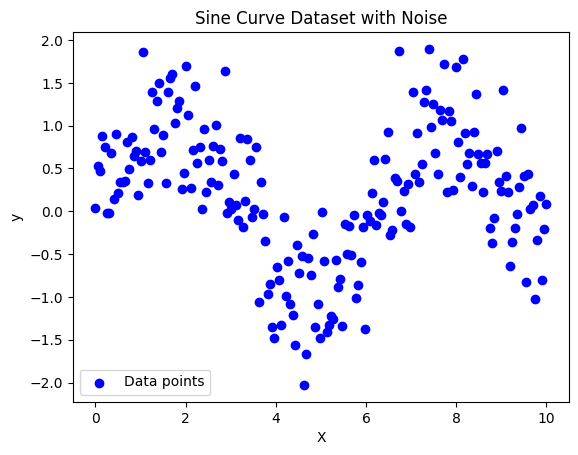

In [91]:
#Visualizing the dataset
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Data points')
plt.title('Sine Curve Dataset with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [92]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
#Training decison tree regressor on sine curve dataset
dtr = DecisionTreeRegressor()
dtr.fit(X, y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

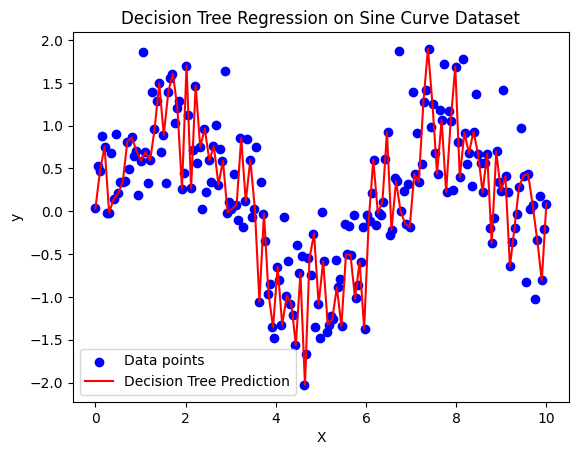

In [93]:
#Trying to plot the curve predicted by decision tree regressor
#Plotting the curve
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = dtr.predict(X_test)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Decision Tree Prediction')
plt.title('Decision Tree Regression on Sine Curve Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Highly Overfitted!!!

# PrePruning 

In [94]:
#Using pre-pruning hyperparameters like max_depth, min_samples_split, min_samples_leaf to control the growth of the tree during training.
pre_dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=10, max_leaf_nodes=10,min_impurity_decrease=0.01, max_features=None)
pre_dt.fit(X, y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_

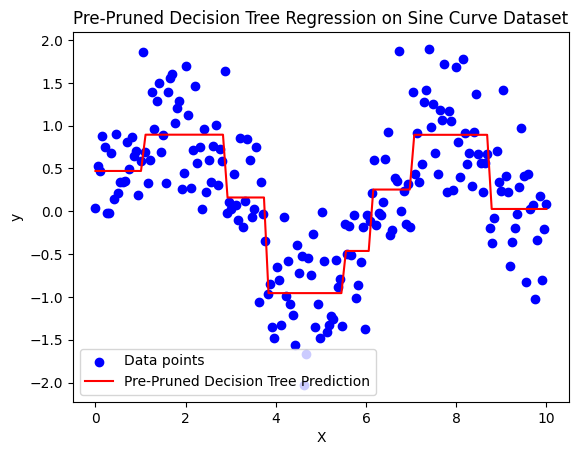

In [95]:
#Trying to plot the curve predicted by decision tree regressor
#Plotting the curve
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred_pre = pre_dt.predict(X_test)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred_pre, color='red', label='Pre-Pruned Decision Tree Prediction')
plt.title('Pre-Pruned Decision Tree Regression on Sine Curve Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()  


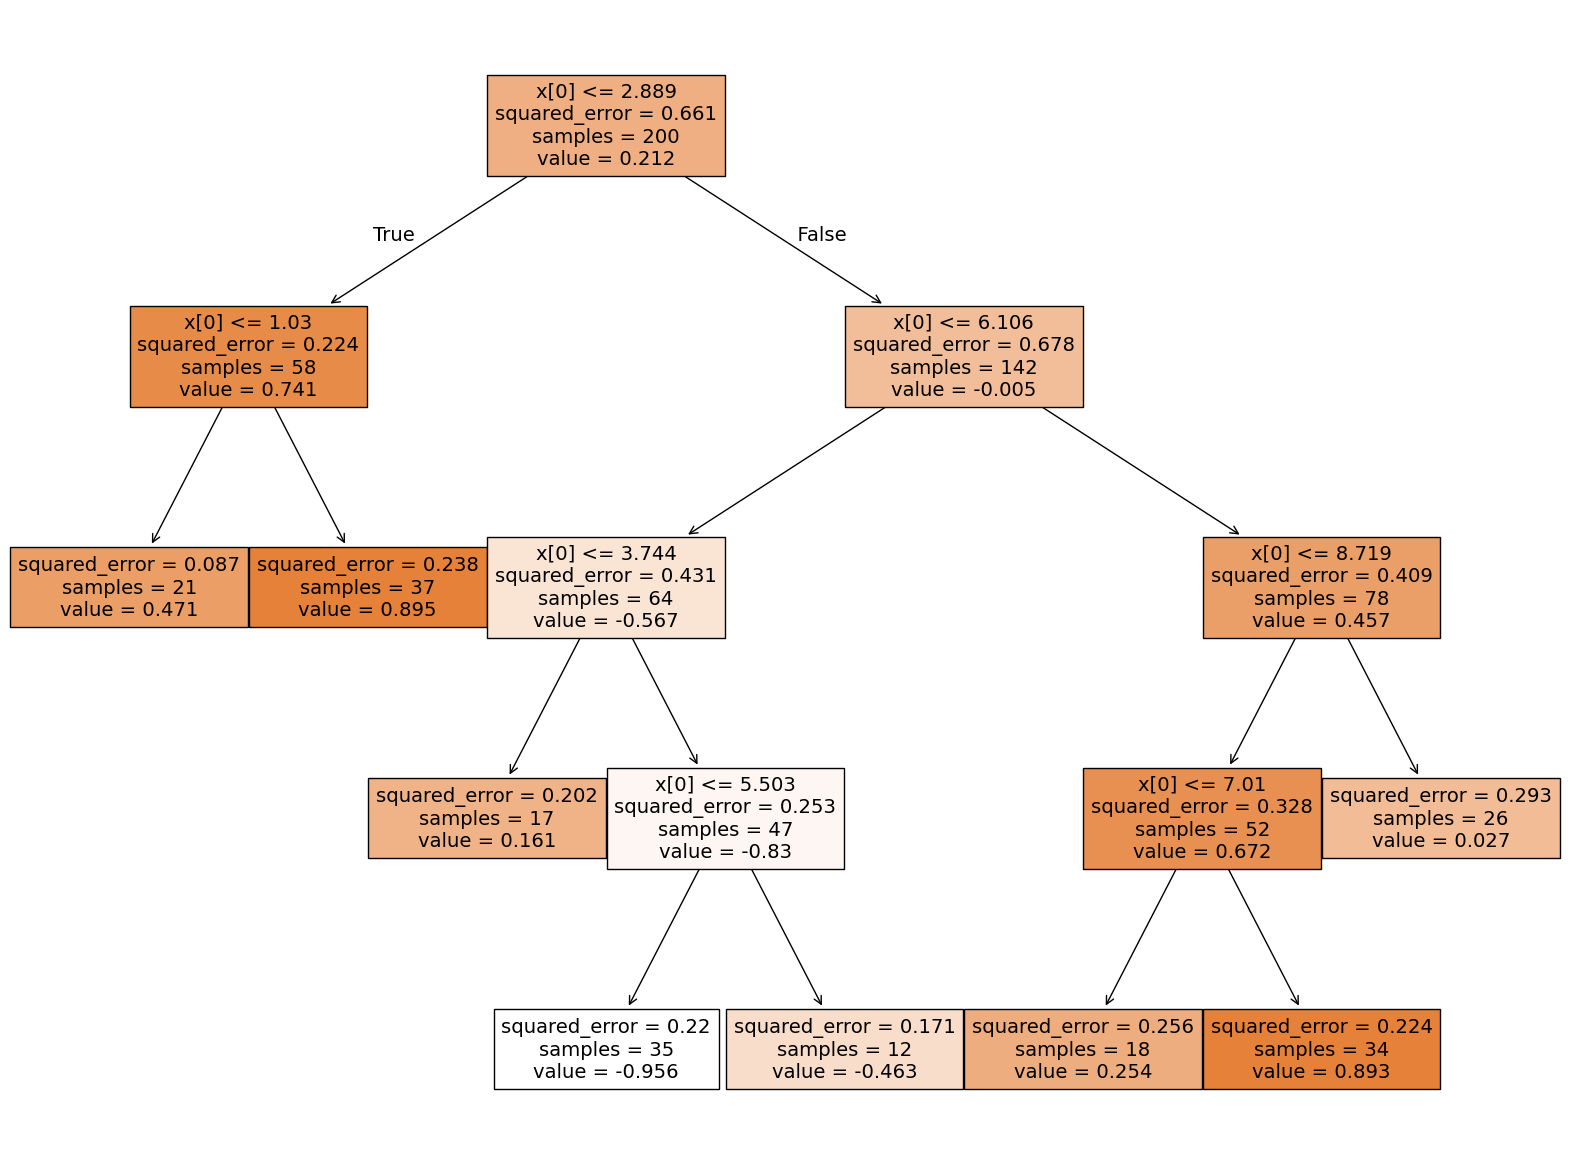

In [96]:
#Creating tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(pre_dt, filled=True)
plt.show()

### Post Pruning

In [97]:
#Importing cancer dataset
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True,as_frame=True)
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#Training our model
from sklearn.tree import DecisionTreeClassifier
dtrs = DecisionTreeClassifier()
dtrs.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

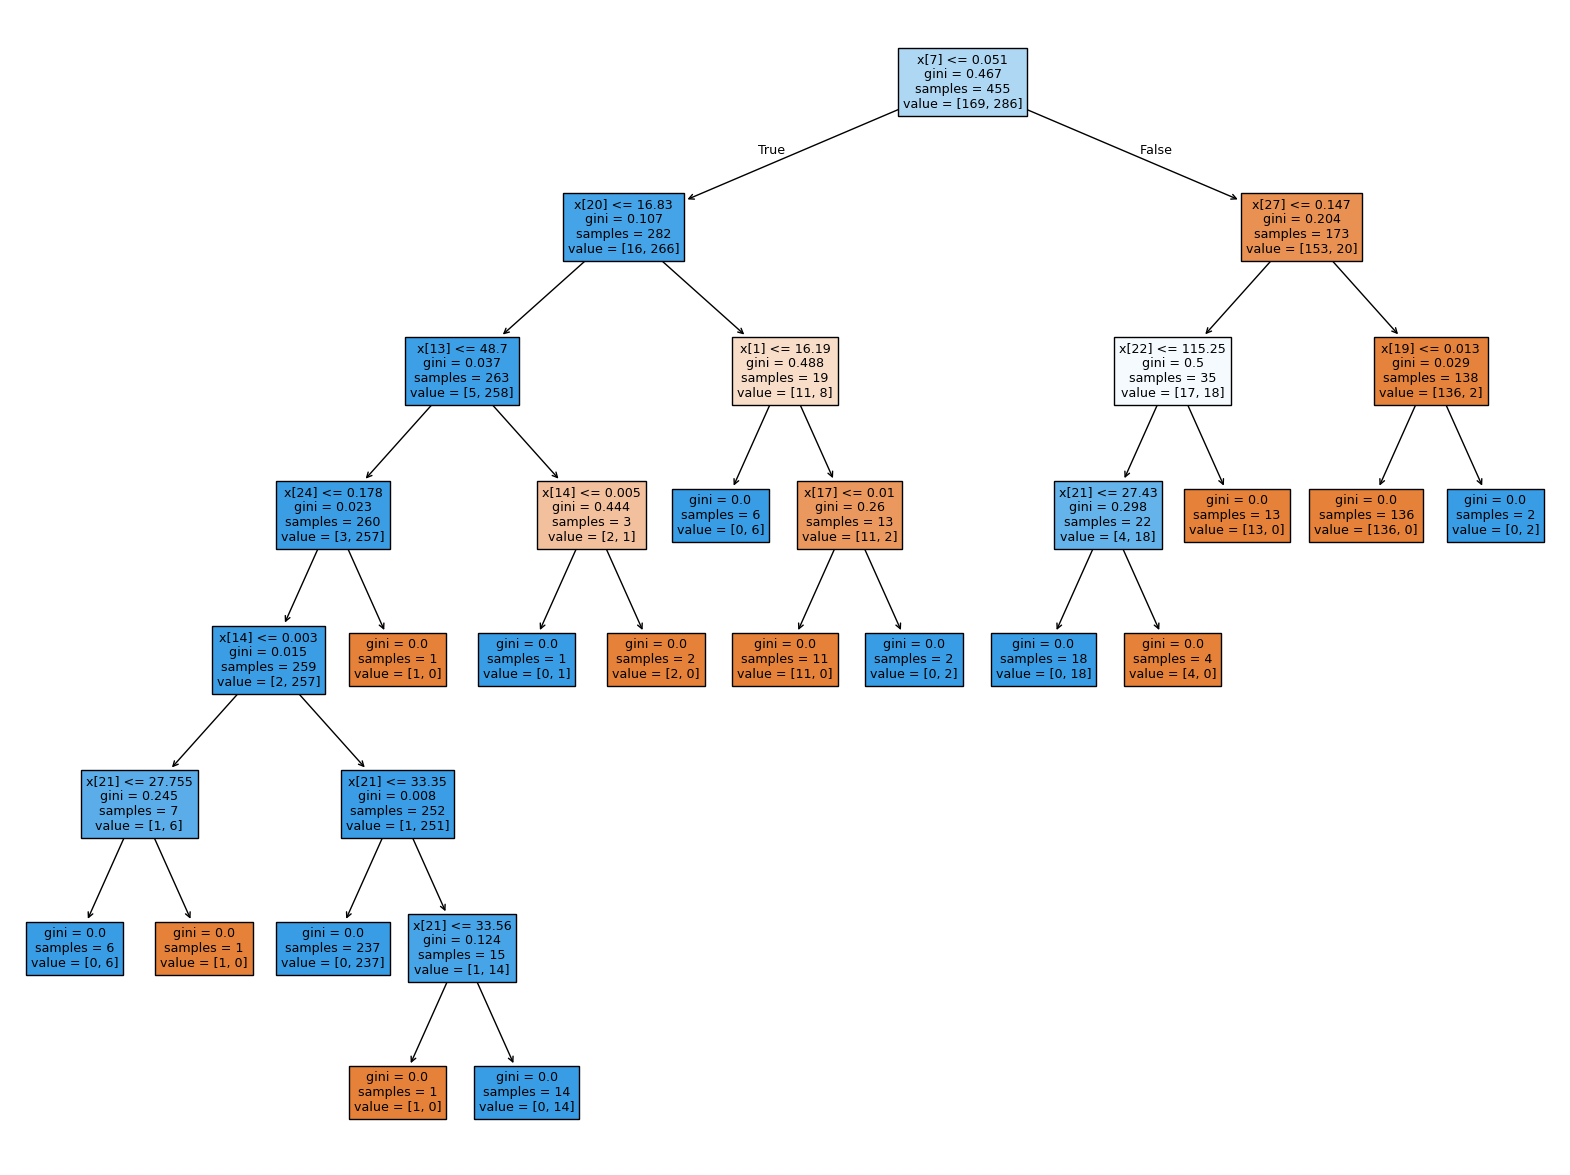

In [113]:
#Creating tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(dtrs, filled=True)
plt.show()

In [114]:
#Accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = dtrs.predict(X_test)
score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred.round())
print("Accuracy Scores:", score)
print("Confusion Matrix:\n", conf_matrix)


Accuracy Scores: 0.9385964912280702
Confusion Matrix:
 [[39  4]
 [ 3 68]]


In [115]:
#Finding the ccp_alpha values for our dataset
path = dtrs.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [116]:
ccp_alphas

array([0.        , 0.00218083, 0.0029304 , 0.00431133, 0.00559513,
       0.00743872, 0.0086638 , 0.01291987, 0.01438561, 0.02404453,
       0.02442056, 0.0306549 , 0.3228506 ])

In [117]:
#Retraining decision tree regressor with different ccp_alpha values
from sklearn.tree import DecisionTreeClassifier
dtrs_list = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dtrs_list.append(dt)
dtrs_list

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.00218083075225933)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0029304029304029304)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.004311334641004935)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005595128280123898)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.007438715131022823)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.008663799968147794)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.012919873648618588)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.014385614385614387)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.024044526901669756)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.02442055678423035)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.030654899499189175)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.32285060033114216))]

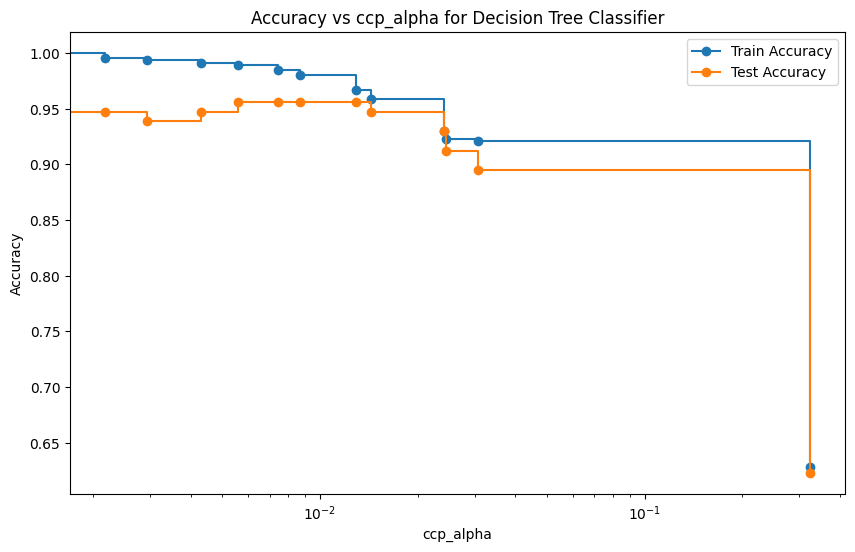

In [121]:
#Calculating predicted values from each classifiers
y_pred_test = [dt.predict(X_test) for dt in dtrs_list]
y_pred_train = [dt.predict(X_train) for dt in dtrs_list]

#Calculating accuracy scores for each classifiers
train_scores = [accuracy_score(y_train, y_pred) for y_pred in y_pred_train]
test_scores = [accuracy_score(y_test, y_pred) for y_pred in y_pred_test]

#Plotting the accuracy scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha for Decision Tree Classifier')
plt.legend()
plt.xscale('log')
plt.show()

In [122]:
#Finding the best ccp_alpha value based on accuracy score
best_r2 = -1
best_ccp_alpha = 0
for ccp_alpha, test_score in zip(ccp_alphas, test_scores):
    if test_score > best_r2:
        best_r2 = test_score
        best_ccp_alpha = ccp_alpha  
best_ccp_alpha  

np.float64(0.005595128280123898)

In [123]:
#Training model with best ccp_alpha
best_dtrs = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
best_dtrs.fit(X_train, y_train)
#Accuracy score and confusion matrix for best pruned model
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_best = best_dtrs.predict(X_test)
best_score = accuracy_score(y_test, y_pred_best)
best_conf_matrix = confusion_matrix(y_test, y_pred_best.round())
print("Best Pruned Model Accuracy Scores:", best_score)
print("Best Pruned Model Confusion Matrix:\n", best_conf_matrix)

Best Pruned Model Accuracy Scores: 0.9473684210526315
Best Pruned Model Confusion Matrix:
 [[39  4]
 [ 2 69]]


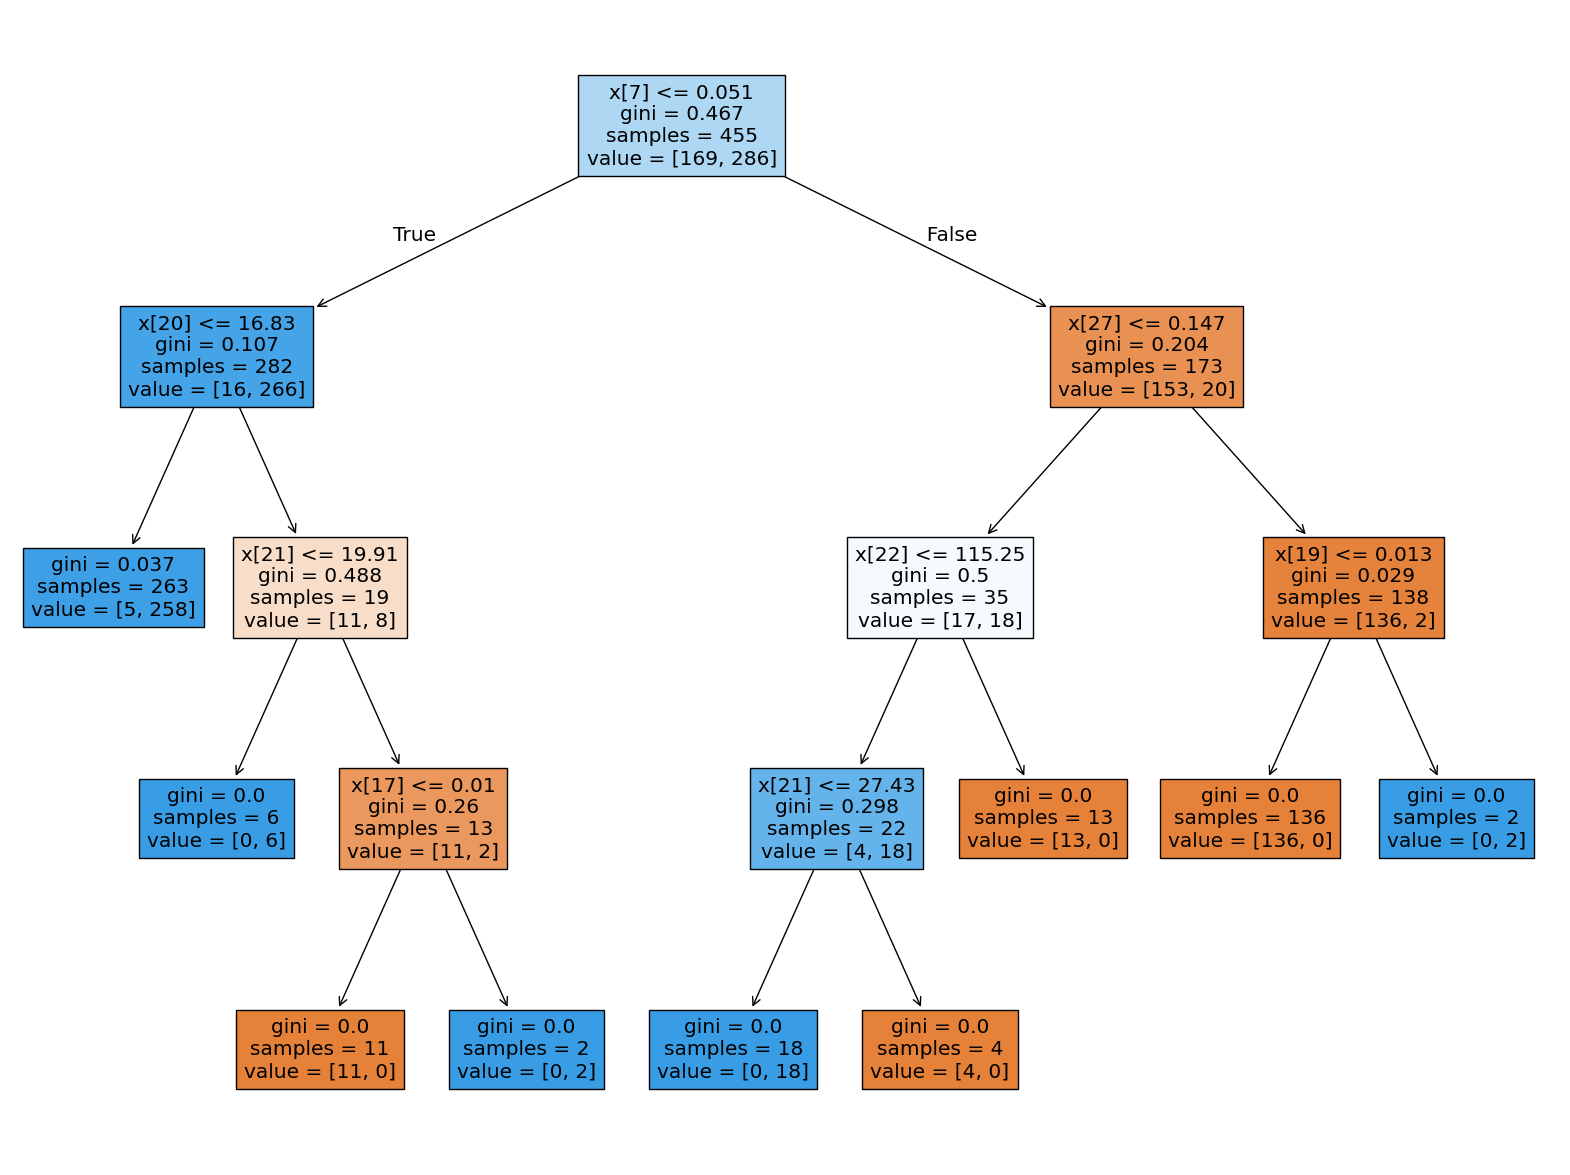

In [124]:
#Creating tree for best pruned model
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(best_dtrs, filled=True)
plt.show()  